In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
fraud = pd.read_csv("Fraud_check.csv")
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [3]:
# EDA

fraud = fraud.rename({'Marital.Status':'Marital_Status',
                      'Taxable.Income':'Taxable_Income',
                      'City.Population':'City_Population',
                      'Work.Experience':'Work_Experience'},axis=1)
fraud.head()

Undergrad Marital_Status  Taxable_Income  City_Population  Work_Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [4]:
fraud.shape

(600, 6)

In [5]:
fraud.describe()

Taxable_Income  City_Population  Work_Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [7]:
fraud.isnull().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [8]:
# We have taxable_income <= 30000 as "Risky" and others are "Good"

fraud.insert(6,'Tax_Class'," ")

In [9]:
for i in range(0,len(fraud['Taxable_Income']),1):
    if fraud['Taxable_Income'].iloc[i]<=30000:
        fraud['Tax_Class'].iloc[i]='Risky'
    else:
        fraud['Tax_Class'].iloc[i]='Good'

C:\Users\vaibh\AppData\Local\Temp\ipykernel_8748\1013303792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Tax_Class'].iloc[i]='Good'
C:\Users\vaibh\AppData\Local\Temp\ipykernel_8748\1013303792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Tax_Class'].iloc[i]='Risky'


In [10]:
fraud.drop(['Taxable_Income'],axis=1,inplace=True)
fraud.head()

Undergrad Marital_Status  City_Population  Work_Experience Urban Tax_Class
0        NO         Single            50047               10   YES      Good
1       YES       Divorced           134075               18   YES      Good
2        NO        Married           160205               30   YES      Good
3       YES         Single           193264               15   YES      Good
4        NO        Married            27533               28    NO      Good

In [11]:
fraud.Tax_Class.value_counts()

Good     476
Risky    124
Name: Tax_Class, dtype: int64

In [12]:
labelencoder = LabelEncoder()
fraud.iloc[:, -1] = labelencoder.fit_transform(fraud.iloc[:,-1])

C:\Users\vaibh\AppData\Local\Temp\ipykernel_8748\1079862779.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  fraud.iloc[:, -1] = labelencoder.fit_transform(fraud.iloc[:,-1])


In [13]:
fraud.head()

Undergrad Marital_Status  City_Population  Work_Experience Urban  Tax_Class
0        NO         Single            50047               10   YES          0
1       YES       Divorced           134075               18   YES          0
2        NO        Married           160205               30   YES          0
3       YES         Single           193264               15   YES          0
4        NO        Married            27533               28    NO          0

In [14]:
fraud = pd.get_dummies(fraud, columns=["Undergrad","Marital_Status","Urban"])

In [15]:
fraud.head()

City_Population  Work_Experience  Tax_Class  Undergrad_NO  Undergrad_YES  \
0            50047               10          0             1              0   
1           134075               18          0             0              1   
2           160205               30          0             1              0   
3           193264               15          0             0              1   
4            27533               28          0             1              0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        1                       0                      0   
2                        0                       1                      0   
3                        0                       0                      1   
4                        0                       1                      0   

   Urban_NO  Urban_YES  
0         0          1  
1         0          1  
2         0          1  
3         0          1  
4         1          0

In [16]:
# Normalization function 

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
fraud_norm = norm_func(fraud.iloc[:,0:])
fraud_norm.head()

City_Population  Work_Experience  Tax_Class  Undergrad_NO  Undergrad_YES  \
0         0.139472         0.333333        0.0           1.0            0.0   
1         0.622394         0.600000        0.0           0.0            1.0   
2         0.772568         1.000000        0.0           1.0            0.0   
3         0.962563         0.500000        0.0           0.0            1.0   
4         0.010081         0.933333        0.0           1.0            0.0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                      0.0                     0.0                    1.0   
1                      1.0                     0.0                    0.0   
2                      0.0                     1.0                    0.0   
3                      0.0                     0.0                    1.0   
4                      0.0                     1.0                    0.0   

   Urban_NO  Urban_YES  
0       0.0        1.0  
1       0.0        1.0  
2       0.0        1.0  
3       0.0        1.0  
4       1.0        0.0

In [18]:
X = fraud_norm.loc[:, fraud_norm.columns != "Tax_Class"]
Y = fraud_norm["Tax_Class"]

In [19]:
# Splitting data into training and testing data set

x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [20]:
# Building Decision Tree Classifier

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

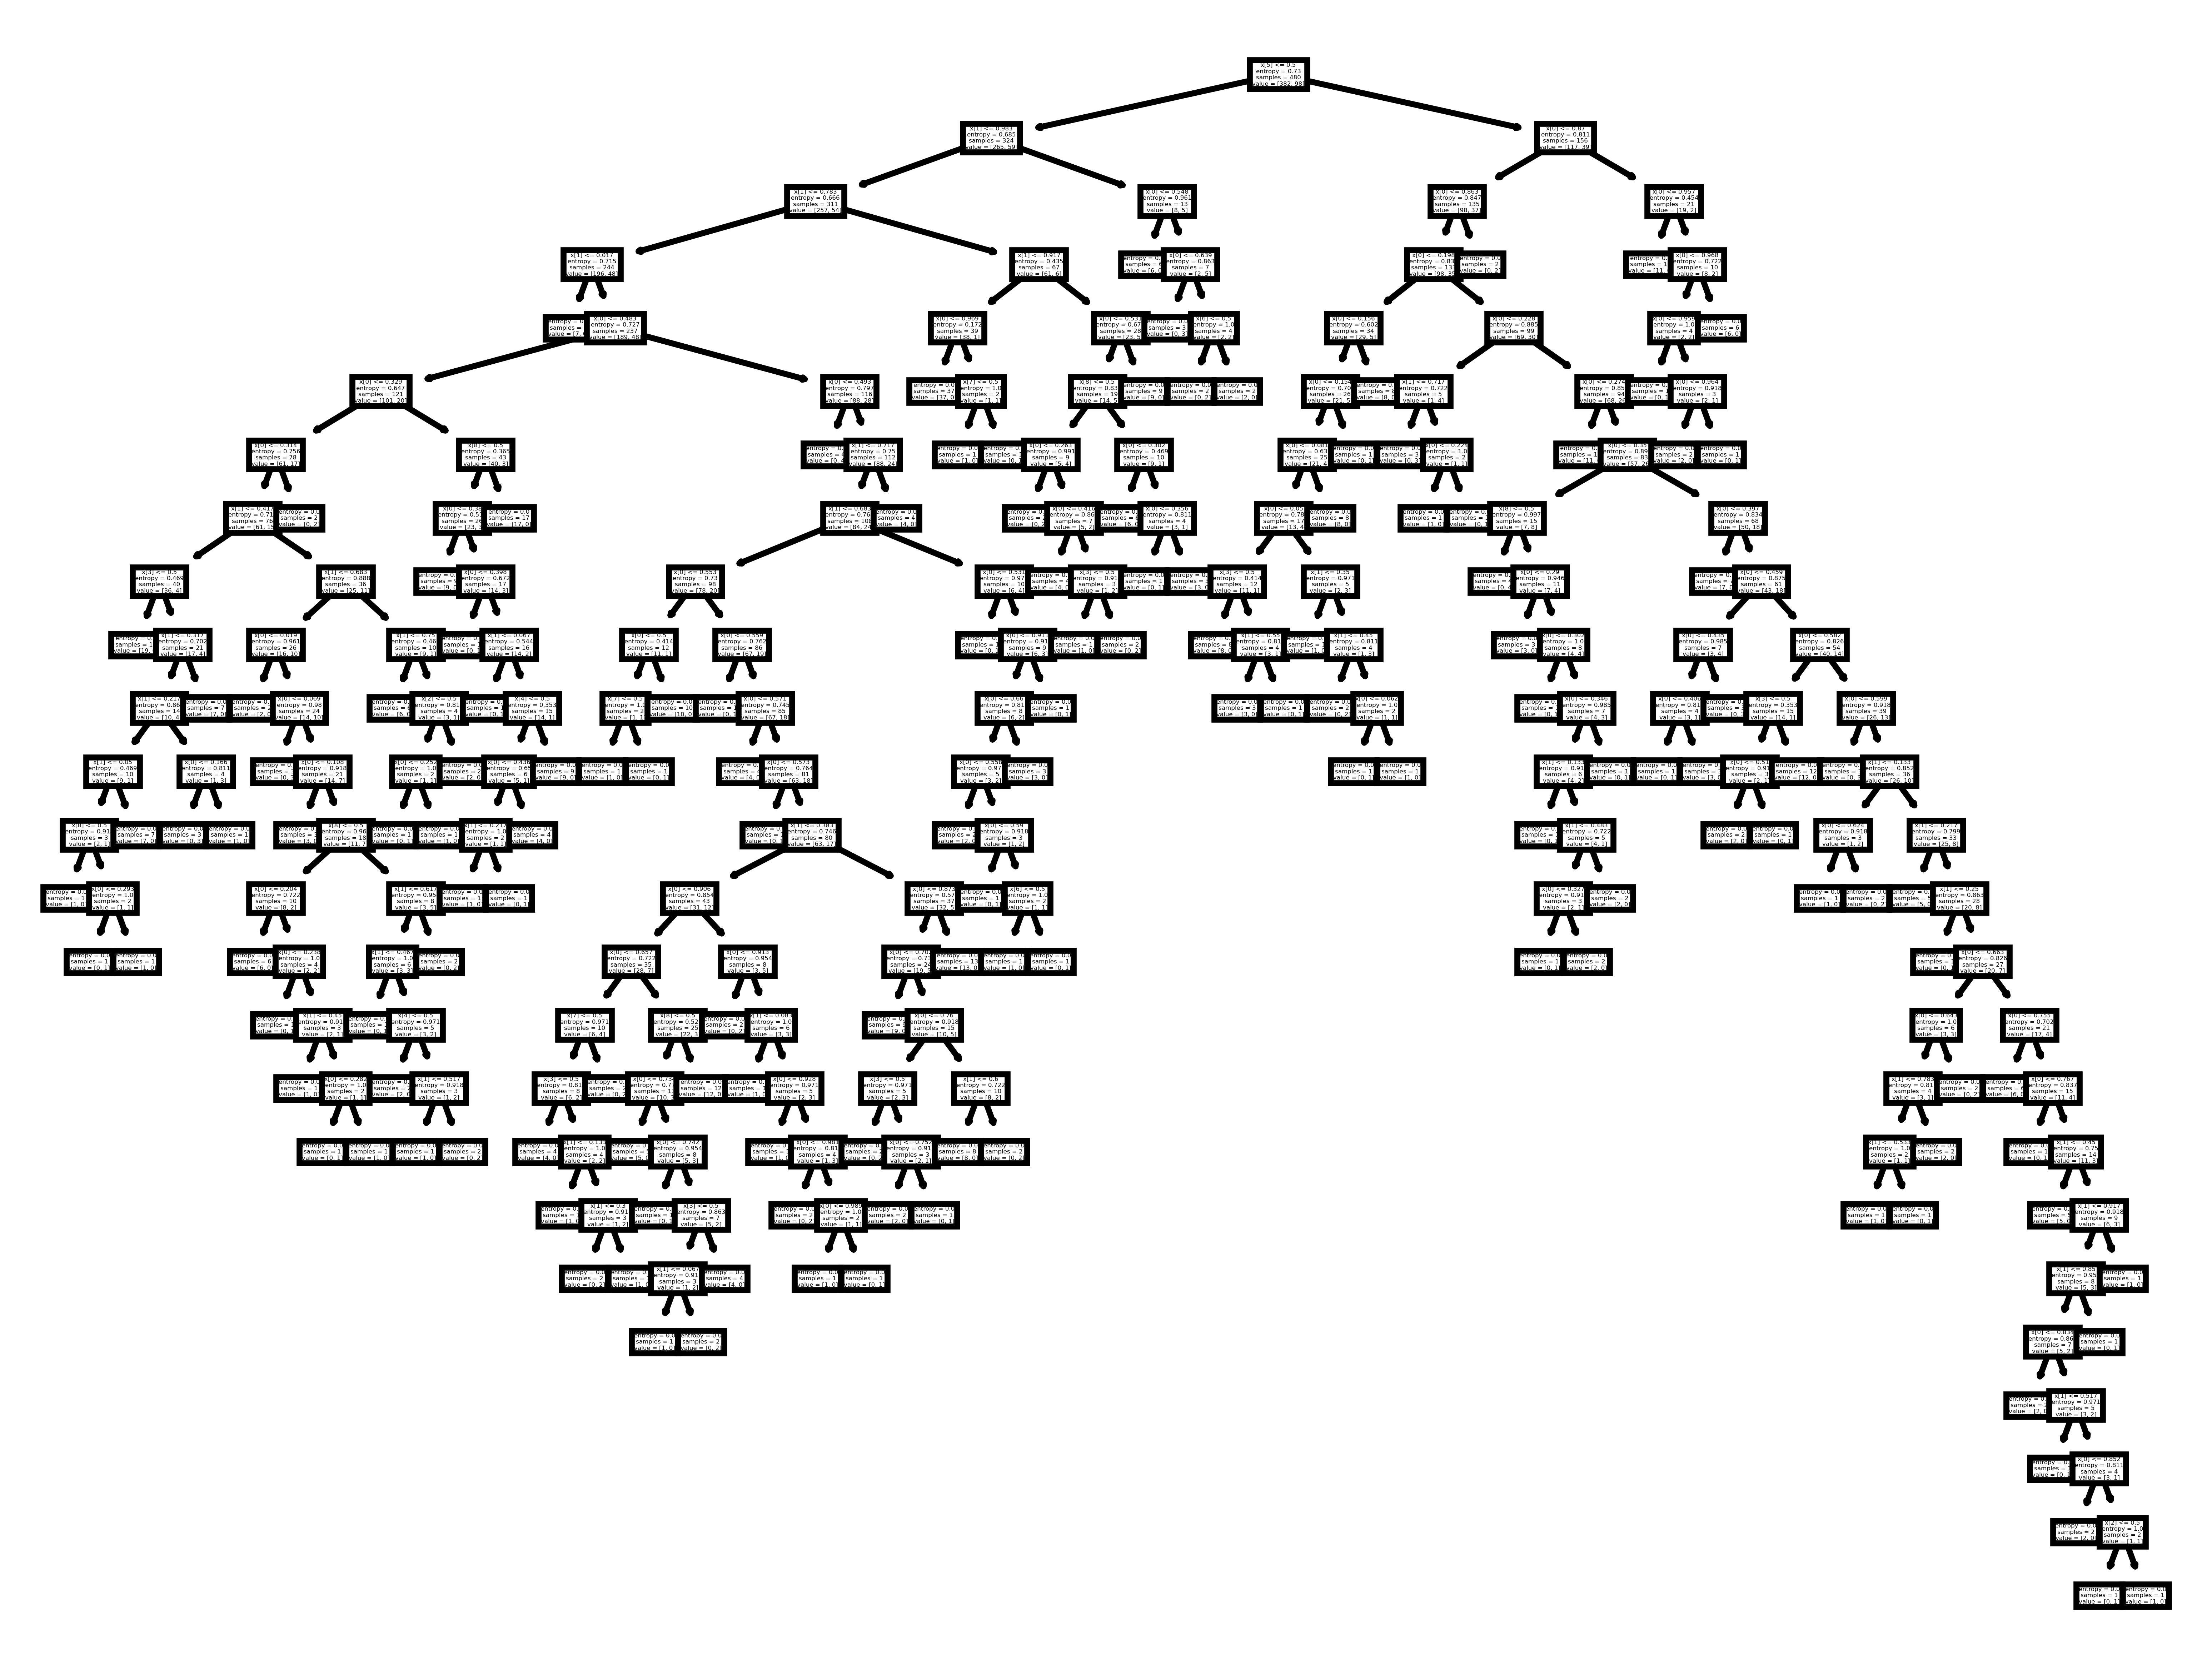

In [21]:
plt.figure(dpi=1200)
tree.plot_tree(model);

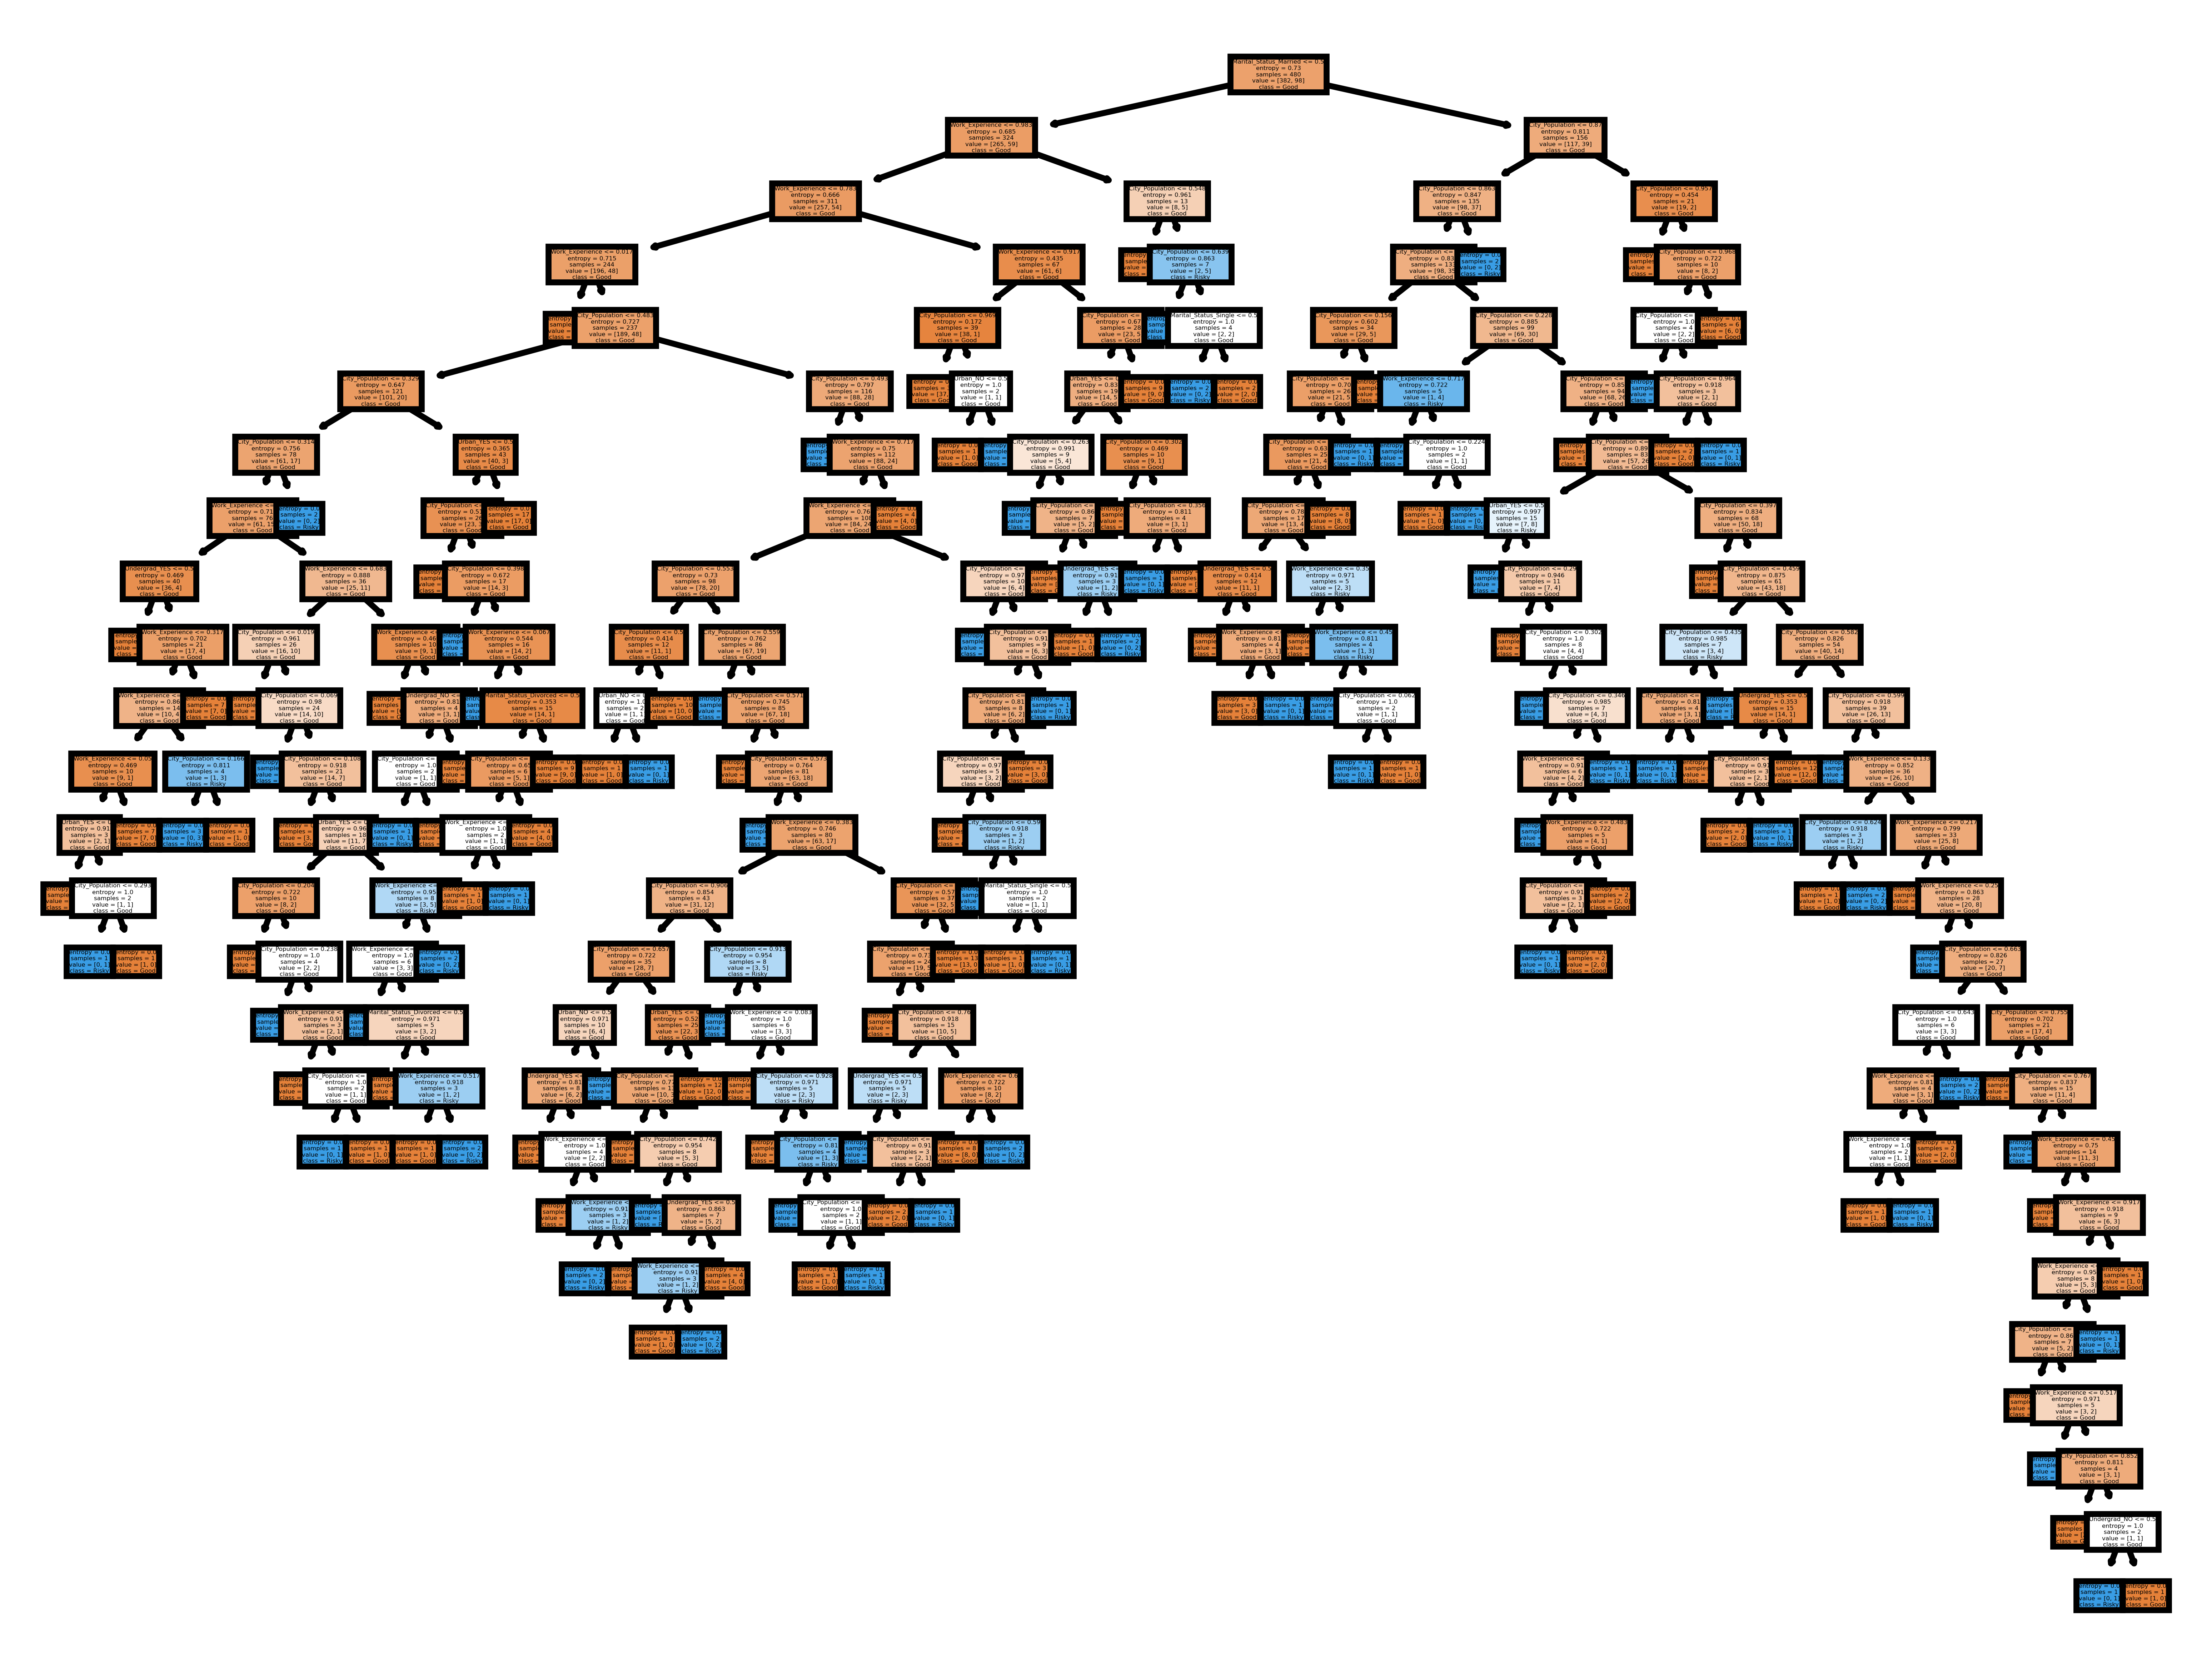

In [22]:
fn=['City_Population', 'Work_Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Urban_NO', 'Urban_YES']
cn=['Good','Risky']
plt.figure(dpi=1200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
#Predicting on test data

preds = model.predict(x_test)
preds

array([1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1.])

In [24]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        94
         1.0       0.22      0.23      0.23        26

    accuracy                           0.66       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.66      0.66      0.66       120



In [25]:
# Trying to improve the accuracy by using K-Fold Validation & Pruning

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [29]:
x = X
y = Y

In [32]:
fraud_norm

City_Population  Work_Experience  Tax_Class  Undergrad_NO  Undergrad_YES  \
0           0.139472         0.333333        0.0           1.0            0.0   
1           0.622394         0.600000        0.0           0.0            1.0   
2           0.772568         1.000000        0.0           1.0            0.0   
3           0.962563         0.500000        0.0           0.0            1.0   
4           0.010081         0.933333        0.0           1.0            0.0   
..               ...              ...        ...           ...            ...   
595         0.078811         0.233333        0.0           0.0            1.0   
596         0.170058         0.066667        0.0           0.0            1.0   
597         0.737240         0.000000        0.0           1.0            0.0   
598         0.886810         0.566667        0.0           0.0            1.0   
599         0.760683         0.533333        0.0           1.0            0.0   

     Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0.0                     0.0                    1.0   
1                        1.0                     0.0                    0.0   
2                        0.0                     1.0                    0.0   
3                        0.0                     0.0                    1.0   
4                        0.0                     1.0                    0.0   
..                       ...                     ...                    ...   
595                      1.0                     0.0                    0.0   
596                      1.0                     0.0                    0.0   
597                      1.0                     0.0                    0.0   
598                      0.0                     1.0                    0.0   
599                      1.0                     0.0                    0.0   

     Urban_NO  Urban_YES  
0         0.0        1.0  
1         0.0        1.0  
2         0.0        1.0  
3         0.0        1.0  
4         1.0        0.0  
..        ...        ...  
595       0.0        1.0  
596       0.0        1.0  
597       0.0        1.0  
598       1.0        0.0  
599       1.0        0.0  

[600 rows x 10 columns]

In [34]:
array = fraud_norm.values
array

array([[0.13947207, 0.33333333, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.62239438, 0.6       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.77256766, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.73723987, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.88680969, 0.56666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76068253, 0.53333333, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [35]:
x = x.values
y = y.values

In [38]:
x

array([[0.13947207, 0.33333333, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.62239438, 0.6       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.77256766, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.73723987, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.88680969, 0.56666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76068253, 0.53333333, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [37]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [39]:
kfold = KFold(n_splits=5)
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=5)
results = cross_val_score(model1, x, y, cv=kfold)
results

array([0.775     , 0.73333333, 0.75833333, 0.775     , 0.85833333])

In [40]:
results.mean()*100.0

78.0